 ## Parallel path creation function

This is where the function which outputs upper and lower counterfactuals was built. Implementing this function is one of the steps towards cleaning the data and generating sampling points for comparison of cloud properties. Before it can be successfully used, the collection of points must be replaced by a smooth curve. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

While in future the input line will be fed into the function, for now we make our own line to input. The input will be a pair of vectors, lat and long, who's values are the lat and long coordinates for each point on the ship track. 

In [3]:
Lat  = []
Long = []
for i in range(12):                #This length will be fixed by the input track
    Long.append(i)
    Lat.append(24*np.sin(0.1*i))  #This is an arbitrary path

In [8]:
def ParallelPoints(Latitude, Longitude, Spacing):
#We first populate a vector of the gradient of the line at each point, which we will use to find orthogonal lines to. 
    SlopeVector = []
    for i in range(len(Long)-1):
        SlopeVector.append((Lat[i+1]-Lat[i])/(Long[i+1]-Long[i]))
    SlopeVector.append(SlopeVector[-1]) #we imagine to find the last point that the ship continues on its last heading. 
#Given the slope, we now want to move outwards orthogonally to this. The direction of step at each point is given by m
    m = []
    for i in range(len(SlopeVector)):
        m.append(-SlopeVector[i]**-1)  #Taking advantage of simple euclidean geometry
    Upper_Long = []
    Upper_Lat  = []
    Lower_Long = []
    Lower_Lat  = []
    for i in range(len(Long)):
        Upper_Long.append(Long[i] + Spacing*(1 / np.sqrt(1 + m[i]**2)))
        Upper_Lat.append(Lat[i] + Spacing*m[i] / np.sqrt(1 + m[i]**2))
        Lower_Long.append(Long[i] - Spacing*(1 / np.sqrt(1 + m[i]**2)))
        Lower_Lat.append(Lat[i] - Spacing*m[i] / np.sqrt(1 + m[i]**2))
        
    plt.scatter(Upper_Long, Upper_Lat, marker='o', color='blue', label='Sampling Points')
    plt.scatter(Lower_Long, Lower_Lat, marker='o', color='blue', label='Sampling Points')
    plt.scatter(Long, Lat, label='Points', color='green', marker='x')
    # Add labels and legend if needed
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('2D Points Plot')
    plt.legend()
    plt.grid()
    plt.show(figsize = (10,5))

TypeError: show() got an unexpected keyword argument 'figsize'

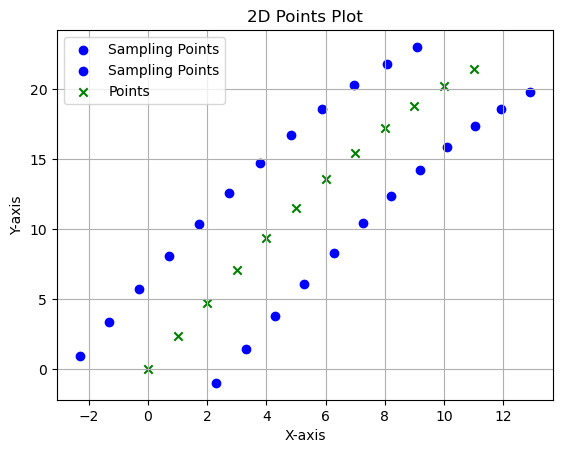

In [9]:
ParallelPoints(Lat, Long, 2.5)

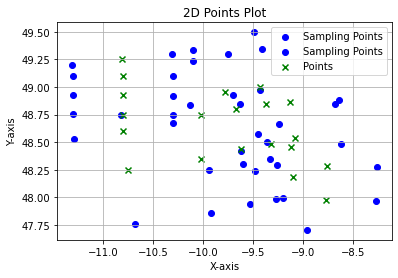

In [10]:
Lat = [49.2489418, 49.1, 48.92435897, 48.74967742, 48.6, 48.2504717, 48.35, 48.43493976, 48.48480565, 48.54111446, 49, 48.95348837, 48.74508197, 48.8, 48.8465625, 48.86621622, 48.45387097, 48.18516129, 48.28375, 47.97525773]
Long = [-10.81402116, -10.8, -10.79974359, -10.80064516, -10.80137931, -10.75023585, -10.02695167, -9.617871486, -9.318551237, -9.080572289, -9.4272, -9.77751938, -10.01967213, -9.675714286, -9.370625, -9.136036036, -9.120967742, -9.104193548, -8.765, -8.769072165]
ParallelPoints(Lat, Long, 0.5)